In [1]:
import numpy as np
import sympy as sp
from sympy import init_printing
from sympy.vector import CoordSys3D
from sympy.vector import curl
#init_printing(use_latex='mathjax')
from IPython.display import Math, display

def printf(expr, prefix=""):
    """Function to print sympy nice

    Args:
        expr (sympy.expr): Any sympy expression
        prefix (str, optional): Prefix to expression in LaTeX. Defaults to "".
    """
    display(Math(prefix + sp.latex(expr)))

# Wedge Product

In [2]:
from sympy.diffgeom.rn import R2_r
from sympy.diffgeom import WedgeProduct

fx, fy = R2_r.base_scalars()
e_x, e_y = R2_r.base_vectors()
dx, dy = R2_r.base_oneforms()

WedgeProduct(-dy, dx)(e_x, e_y)

1

# Parallel Vectors Operator

In [3]:
x, y, z, t, alpha = sp.symbols("x y z t alpha")

class PVSympy:
    def __init__(self, u):
        self.N = CoordSys3D('R')
        
        self.vector_field = sp.Matrix(u)
        self.jacobian = self.vector_field.jacobian(sp.Matrix([x,y,z]))
        self.acceleration = self.jacobian @ self.vector_field
        
        v1 = self.vector_field[0]*self.N.i+self.vector_field[1]*self.N.j+self.vector_field[2]*self.N.k
        v2 = self.acceleration[0]*self.N.i+self.acceleration[1]*self.N.j+self.acceleration[2]*self.N.k

        self.parallel_vectors = v1.cross(v2).to_matrix(self.N).simplify()

        self.pv_flow = self.parallel_vectors.diff(t)

        #self.pv_solution = sp.solve(self.parallel_vectors, sp.Matrix([x,y,z]))

        self.eigvecs = self.jacobian.eigenvects()

    def print(self, eigvecs = False):
        printf(self.vector_field, "u=")
        printf(self.jacobian, "\\nabla u=")
        printf(self.acceleration, "(\\nabla u)u=")
        printf(self.parallel_vectors, "u\\times(\\nabla u)u=")
        printf(self.pv_flow, "\\frac{\mathrm{d}}{\mathrm{d}t} (u\\times(\\nabla u)u)=")
        #printf(self.pv_solution, "\{x\in\mathbb{R}^n\mid u\\times(\\nabla u)u = 0\}=")
        if eigvecs:
            printf(self.eigvecs, "(\lambda_i, v_i)=")

    def get_function(self):
        return sp.lambdify((x,y,z,t),self.vector_field)


In [4]:
pv = PVSympy([x,-y, alpha*z])
pv.print(eigvecs=True)

printf(sp.solve(sp.Matrix([y**2-t,-x]), (x,y)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Saddle-Center Bifurcation

In [5]:
pv = PVSympy([y**2-t,-x, alpha*z])
pv.print(eigvecs=True)

printf(sp.solve(sp.Matrix([y**2-t,-x]), (x,y)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Singular Field Line Reconnection

In [8]:
pv = PVSympy([(y-2)**2-t+z**2, -x, alpha*z+20])
pv.print(eigvecs=True)

sp.solve(pv.acceleration, (x,y,z))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[(0, 2 - sqrt(alpha**2*t - 400)/alpha, -20/alpha),
 (0, 2 + sqrt(alpha**2*t - 400)/alpha, -20/alpha)]

In [13]:
tangent = sp.Matrix([pv.pv_solution[0][0].diff(z), pv.pv_solution[0][1].diff(z), pv.pv_solution[0][2].diff(z)])
printf(tangent, "\gamma=")

u = pv.eigvecs[0][2][0]
angle = sp.acos(tangent.dot(pv.vector_field)/(tangent.norm()*pv.vector_field.norm()))
printf(angle, "angle=")
printf(angle.subs(alpha, 1).subs(t,1).subs(x,0).subs(y,1).subs(z,0.5), "angle=")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [66]:
# angle between eigenvector and vector field
angle = sp.acos(pv.eigvecs[0][2][0].dot(pv.vector_field)/(pv.eigvecs[0][2][0].norm()*pv.vector_field.norm()))/sp.pi*180.0
printf(angle.subs(x,0).subs(y,0).subs(z,1).subs(alpha,1.0).subs(t, 1.0).evalf(), "angle=")
    #), "angle=")

<IPython.core.display.Math object>

In [69]:
v = pv.vector_field
v_R = v[0]*pv.N.i + v[1]*pv.N.j + v[2]*pv.N.k
u_R = u[0]*pv.N.i + u[1]*pv.N.j + u[2]*pv.N.k
pv_uv = v_R.cross(u_R).to_matrix(pv.N).simplify()
printf(sp.solve(pv_uv, sp.Matrix([x,y,z])), "u\\times v=")

<IPython.core.display.Math object>

In [76]:
pv = PVSympy([y+t*z**2, x, alpha])
pv.print(eigvecs=True)

sp.solve(pv.acceleration, (x,y,z))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[(-2*alpha*t*z, -t*z**2, z)]

# Pitchfork Bifurcation

In [7]:
pv = PVSympy([t*y - y**3, x, alpha])
pv.print(eigvecs=True)

sp.solve(pv.acceleration, (x,y,z))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[(0, 0, z), (0, -sqrt(t), z), (0, sqrt(t), z)]

# Harris Sheet

In [8]:
pv = PVSympy([-t*sp.sin(y),x, 1])
pv.print(eigvecs=True)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Solar Flux Rope

In [9]:
pv = PVSympy([-1-(t*(1-y**2)/((1+y**2)*(1+z**2))),x, 1])
pv.print(eigvecs=True)

KeyboardInterrupt: 

In [9]:
pv = PVSympy([sp.tanh(y), t*sp.sin(x), alpha*z])
pv.print(eigvecs=True)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Vector Potential

In [15]:
from sympy.vector import CoordSys3D
from sympy.vector import curl
import sympy as sp
x,y,z,alpha,A, sigma = sp.symbols("x y z alpha A sigma")
R = CoordSys3D('R')

#vec_pot = A*sp.exp(-(x-1)**2 - y**2) + A*sp.exp(-(x+1)**2 - y**2)

B_field = curl((1-alpha)*R.y*R.i+R.x*R.j+(A*sp.exp((-(R.x-1)**2 - R.y**2)/sigma**2) + A*sp.exp((-(R.x+1)**2 - R.y**2)/sigma**2))*R.k, R)

B_field_mat = B_field.to_matrix(R)
sp.print_latex(B_field_mat)
#printf(B_field_mat)

#printf(B_field_mat.jacobian([R.x, R.y, R.z]))#.eigenvects()


\left[\begin{matrix}- \frac{2 \mathbf{{y}_{R}} A e^{\frac{- \mathbf{{y}_{R}}^{2} - \left(\mathbf{{x}_{R}} - 1\right)^{2}}{\sigma^{2}}}}{\sigma^{2}} - \frac{2 \mathbf{{y}_{R}} A e^{\frac{- \mathbf{{y}_{R}}^{2} - \left(\mathbf{{x}_{R}} + 1\right)^{2}}{\sigma^{2}}}}{\sigma^{2}}\\- \frac{A \left(2 - 2 \mathbf{{x}_{R}}\right) e^{\frac{- \mathbf{{y}_{R}}^{2} - \left(\mathbf{{x}_{R}} - 1\right)^{2}}{\sigma^{2}}}}{\sigma^{2}} - \frac{A \left(- 2 \mathbf{{x}_{R}} - 2\right) e^{\frac{- \mathbf{{y}_{R}}^{2} - \left(\mathbf{{x}_{R}} + 1\right)^{2}}{\sigma^{2}}}}{\sigma^{2}}\\\alpha\end{matrix}\right]


In [64]:
from sympy.vector import CoordSys3D
from sympy.vector import curl
import sympy as sp
x,y,z,alpha,A, sigma = sp.symbols("x y z alpha A sigma")
R = CoordSys3D('R')

#vec_pot = A*sp.exp(-(x-1)**2 - y**2) + A*sp.exp(-(x+1)**2 - y**2)

B_field = (((1-t)*sp.sin(R.y))*R.i+(t*sp.tanh(R.x))*R.j+alpha*R.k)
#B_field = (((1-t)*R.y**3)*R.i+(t*R.x**3)*R.j+alpha*R.k)

current_density = curl(B_field, R)
printf(current_density.subs(1-sp.tanh(R.x)**2, sp.sech(R.x)**2).subs(1-sp.tanh(R.y)**2, sp.sech(R.y)**2).subs(t,0.5), "J=")

B_field_mat = B_field.to_matrix(R)
dB = B_field_mat.jacobian([R.x, R.y, R.z])#.eigenvects()
S = 0.5*(dB+dB.transpose()).subs(1-sp.tanh(R.x)**2, sp.sech(R.x)**2).subs(1-sp.tanh(R.y)**2, sp.sech(R.y)**2)
printf(S)
l1 = S.eigenvects()[0][0]
l2 = S.eigenvects()[1][0]
l3 = S.eigenvects()[2][0]
I_2 = -(l1*l2+l2*l3+l3*l1)
printf(sp.solve(I_2, (R.x, R.y, R.z)))
printf(I_2.simplify().subs(t,0.5), "I_2=")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
from sympy.vector import CoordSys3D
from sympy.vector import curl
import sympy as sp
x,y,z,alpha,A, sigma, t = sp.symbols("x y z alpha A sigma t")
R = CoordSys3D('R')

#vec_pot = A*sp.exp(-(x-1)**2 - y**2) + A*sp.exp(-(x+1)**2 - y**2)

B_field = ((sp.tanh(R.y))*R.i-(t*sp.sin(R.x))*R.j+alpha*R.k)
#B_field = (((1-t)*R.y**3)*R.i+(t*R.x**3)*R.j+alpha*R.k)

current_density = curl(B_field, R)
printf(current_density.to_matrix(R).subs(1-sp.tanh(R.x)**2, sp.sech(R.x)**2).subs(1-sp.tanh(R.y)**2, sp.sech(R.y)**2))#.norm(), "J=")
printf(current_density.to_matrix(R).subs(1-sp.tanh(R.x)**2, sp.sech(R.x)**2).subs(1-sp.tanh(R.y)**2, sp.sech(R.y)**2).norm(), "J=")

B_field_mat = B_field.to_matrix(R)
dB = B_field_mat.jacobian([R.x, R.y, R.z])#.eigenvects()
S = 1/2*(dB+dB.transpose()).subs(1-sp.tanh(R.x)**2, sp.sech(R.x)**2).subs(1-sp.tanh(R.y)**2, sp.sech(R.y)**2)

printf(S)

l1 = S.eigenvects()[0][0]
l2 = S.eigenvects()[1][0]
l3 = S.eigenvects()[2][0]

I_2 = -(l1*l2+l2*l3+l3*l1)

#printf(sp.solve(I_2, (R.x, R.y, R.z)))
printf(I_2.simplify(), "I_2=")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
t0 = 0
printf(current_density.to_matrix(R).subs(1-sp.tanh(R.x)**2, sp.sech(R.x)**2).subs(1-sp.tanh(R.y)**2, sp.sech(R.y)**2).norm().subs(t,t0), "J=")
printf(I_2.simplify().subs(t,t0), "I_2=")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
t0 = 1
printf(current_density.to_matrix(R).subs(1-sp.tanh(R.x)**2, sp.sech(R.x)**2).subs(1-sp.tanh(R.y)**2, sp.sech(R.y)**2).norm().subs(t,t0), "J=")
printf(I_2.simplify().subs(t,t0), "I_2=")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

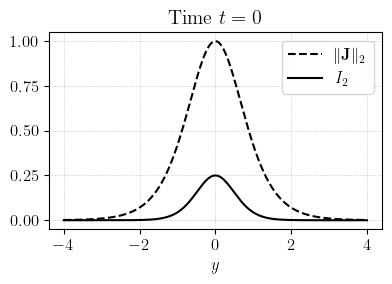

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tk
plt.style.use('light')

fig, ax = plt.subplots(figsize=(4,3))
xlin = np.linspace(-4, 4, 500)

sech = np.sqrt(1-np.tanh(xlin)**2)

J_num = np.abs(sech)**2
I_2_num = 0.25*(sech)**4

ax.plot(xlin, J_num, label="$\|\\mathbf{J}\|_2$", linestyle="--", color="black")
ax.plot(xlin, I_2_num, label="$I_2$", color="black")

# ax.xaxis.set_major_formatter(tk.FormatStrFormatter('%g $\pi$'))
# ax.xaxis.set_major_locator(tk.MultipleLocator(base=1.0))

# Add labels and title
ax.set_xlabel('$y$', fontname='serif')
#ax.set_ylabel('f(x)', fontname='serif')
ax.set_title('Time $t=0$', fontname='serif')

# Use font with serifs
plt.rcParams['font.family'] = 'serif'
plt.legend()
plt.tight_layout()
plt.savefig("/home/max/Nextcloud/Bachelor/Media/Plots/shear_t0.pdf", facecolor='w')
plt.show()


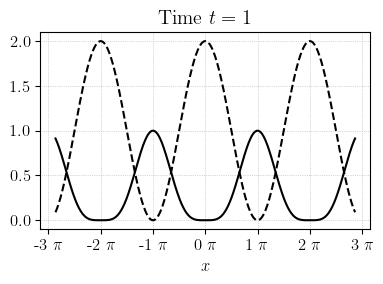

In [22]:


fig, ax = plt.subplots(figsize=(4,3))
xlin = np.linspace(-9, 9, 500)

sech = np.sqrt(1-np.tanh(xlin)**2)

J_num = np.abs(np.cos(xlin)+1)
I_2_num = 0.25*(np.cos(xlin)-1)**2

ax.plot(xlin / np.pi, J_num, label="$\|\\mathbf{J}\|_2$", linestyle="--", color="black")
ax.plot(xlin / np.pi, I_2_num, label="$I_2$", color="black")


ax.xaxis.set_major_formatter(tk.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tk.MultipleLocator(base=1.0))

# Add labels and title
ax.set_xlabel('$x$')#, fontname='serif')
#ax.set_ylabel('f(x)')#, fontname='serif')
ax.set_title('Time $t=1$', fontname='serif')
#plt.legend()
# Use font with serifs
#plt.rcParams['font.fam
plt.tight_layout()
plt.savefig("/home/max/Nextcloud/Bachelor/Media/Plots/shear_t1.pdf", facecolor='w')
plt.show()


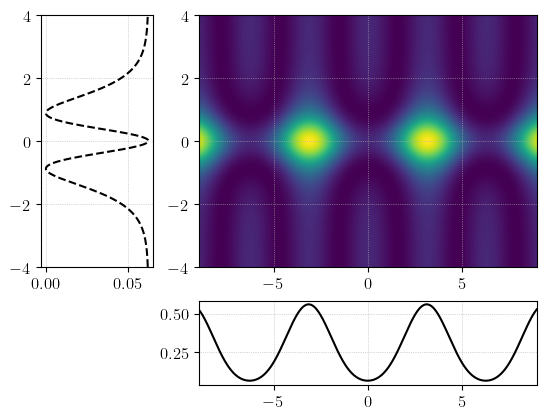

In [33]:
from matplotlib import gridspec

xlin = np.linspace(-9, 9, 500)
ylin = np.linspace(-4, 4, 500)
x,y = np.meshgrid(xlin, ylin)

sech = np.sqrt(1-np.tanh(y)**2)
z = 0.25*(0.5*np.cos(x)-sech**2)**2

gs = gridspec.GridSpec(2, 2, width_ratios=[1,3], height_ratios=[3,1])
ax = plt.subplot(gs[0,1])
axl = plt.subplot(gs[0,0], sharey=ax)
axb = plt.subplot(gs[1,1], sharex=ax)

ax.imshow(z, origin='lower', extent=[-9,9,-4,4], aspect='auto')
#plt.xlim()
#np.mean(z, axis=1)
axl.plot(z[:,len(z)//2], ylin, label="$\|\\mathbf{J}\|_2$", linestyle="--", color="black")
axb.plot(xlin,z[len(z)//2], label="$I_2$", color="black")


In [9]:
from sympy.vector import CoordSys3D
from sympy.vector import curl
import sympy as sp
x,y,z,alpha,A, sigma, t = sp.symbols("x y z alpha A sigma t")
R = CoordSys3D('R')

B = sp.Matrix([-(1-t)*y**3 + z**2, t*x**3, alpha])
B.jacobian([x,y,z]).subs(t,0).eigenvects()

[(0,
  3,
  [Matrix([
   [1],
   [0],
   [0]]),
   Matrix([
   [           0],
   [2*z/(3*y**2)],
   [           1]])])]

# Hamiltonian 

In [9]:
x,y,eps = sp.symbols("x y epsilon")

H = x**2/2 + y**3/3 + eps*y

dx = H.diff(y)
dy = -H.diff(x)

u = sp.Matrix([dx, dy])
u

Matrix([
[epsilon + y**2],
[            -x]])

# First try

In [10]:
x, y, z, t = sp.symbols("x y z t")

lin = np.linspace(-5, 5, 100)
# x,y = np.meshgrid(lin, lin)
x0,y0 = 1,1
sigma = 0.5
X = x + x0
Y = y + y0
dist = X**2 + Y**2
decay = sp.exp(-dist / sigma**2)
# decay = 1 / distim
vec = sp.Matrix([-Y, X, z])
spiral = vec * decay


jac = spiral.jacobian(sp.Matrix([x, y, z]))
parallel_vec = spiral.cross(jac*spiral)
sol = sp.solve(parallel_vec, sp.Matrix([x,y,z]))

lin = np.linspace(-2,2,10)
Xx,Yy,Zz = np.meshgrid(lin,lin,lin,indexing="ij")

#spiral2 = spiral(x, y, -1, 0, 1)
F_x = sp.lambdify((x, y, z), sol[0])
F_y = sp.lambdify((x, y, z), sol[1])
F_z = sp.lambdify((x, y, z), sol[2])

U = F_x(Xx, Yy, Zz)
V = F_y(Xx, Yy, Zz)
W = F_z(Xx, Yy, Zz)

F_x(1,1,2)

# sp.gradie

(-1.0, -1.0, 2)

In [21]:
dx = y**2-1
dy = -x

u = dx/dy
printf(sp.solve([u,sp.integrate(u,y)], [x,y]))

<IPython.core.display.Math object>